# Chapter 10: Model Selection

Load the packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Testing based procedures

Load in the data:

In [2]:
statedata = pd.read_csv("data/statedata.csv",index_col=0)
statedata.head()

,Population,Income,Illiteracy,LifeExp,Murder,HSGrad,Frost,Area
AL,3615,3624,2.1,69.05,15.1,41.3,20,50708
AK,365,6315,1.5,69.31,11.3,66.7,152,566432
AZ,2212,4530,1.8,70.55,7.8,58.1,15,113417
AR,2110,3378,1.9,70.66,10.1,39.9,65,51945
CA,21198,5114,1.1,71.71,10.3,62.6,20,156361


Fit the base model:

In [3]:
lmod = smf.ols('LifeExp ~ Population + Income + Illiteracy + Murder + HSGrad + Frost + Area', data=statedata).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LifeExp   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     16.74
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           2.53e-10
Time:                        10:37:14   Log-Likelihood:                -51.855
No. Observations:                  50   AIC:                             119.7
Df Residuals:                      42   BIC:                             135.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.9432      1.748     40.586      0.000      67.416      74.471
Population   5.18e-05   2.92e-05      1.775      0.083    -7.1e-06       0.000
Income      -2.18e-05      0.000     -0.089      0.929      -0.001       0.000
Illiteracy     0.0338      0.366      0.092      0.927      -0.705       0.773
Murder        -0.3011      0.047     -6.459      0.000      -0.395      -0.207
HSGrad         0.0489      0.023      2.098      0.042       0.002       0.096
Frost         -0.0057      0.003     -1.825      0.075      -0.012       0.001
Area       -7.383e-08   1.67e-06     -0.044      0.965   -3.44e-06    3.29e-06
==============================================================================
Omnibus:                        2.385   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.420
Skew:                          -0.081   Prob(JB):                        0.492
Kurtosis:                       2.190   Cond. No.                     1.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Backward elimination using p-values:

In [4]:
lmod.pvalues.round(2)

Intercept     0.00
Population    0.08
Income        0.93
Illiteracy    0.93
Murder        0.00
HSGrad        0.04
Frost         0.08
Area          0.96
dtype: float64

In [5]:
lmod = smf.ols('LifeExp ~ Population + Income + Illiteracy + Murder + HSGrad + Frost', data=statedata).fit()
lmod.pvalues.round(2)

Intercept     0.00
Population    0.08
Income        0.92
Illiteracy    0.93
Murder        0.00
HSGrad        0.02
Frost         0.06
dtype: float64

In [6]:
lmod = smf.ols('LifeExp ~ Population + Income + Murder + HSGrad + Frost', data=statedata).fit()
lmod.pvalues.round(2)

Intercept     0.00
Population    0.07
Income        0.92
Murder        0.00
HSGrad        0.01
Frost         0.02
dtype: float64

In [7]:
lmod = smf.ols('LifeExp ~ Population + Murder + HSGrad + Frost', data=statedata).fit()
lmod.pvalues.round(2)

Intercept     0.00
Population    0.05
Murder        0.00
HSGrad        0.00
Frost         0.02
dtype: float64

In [8]:
lmod = smf.ols('LifeExp ~ Murder + HSGrad + Frost', data=statedata).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LifeExp   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     38.03
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           1.63e-12
Time:                        10:37:14   Log-Likelihood:                -53.987
No. Observations:                  50   AIC:                             116.0
Df Residuals:                      46   BIC:                             123.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.0364      0.983     72.246      0.000      69.057      73.016
Murder        -0.2831      0.037     -7.706      0.000      -0.357      -0.209
HSGrad         0.0499      0.015      3.286      0.002       0.019       0.081
Frost         -0.0069      0.002     -2.824      0.007      -0.012      -0.002
==============================================================================
Omnibus:                        5.102   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                2.569
Skew:                          -0.290   Prob(JB):                        0.277
Kurtosis:                       2.053   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Variables that are eliminated may have some significance.

In [9]:
lmod = smf.ols('LifeExp ~ Illiteracy + Murder + Frost', data=statedata).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LifeExp   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     31.69
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           2.91e-11
Time:                        10:37:14   Log-Likelihood:                -57.147
No. Observations:                  50   AIC:                             122.3
Df Residuals:                      46   BIC:                             129.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.5567      0.584    127.611      0.000      73.381      75.733
Illiteracy    -0.6018      0.299     -2.013      0.050      -1.203   -5.18e-05
Murder        -0.2800      0.043     -6.454      0.000      -0.367      -0.193
Frost         -0.0087      0.003     -2.937      0.005      -0.015      -0.003
==============================================================================
Omnibus:                        0.019   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.990   Jarque-Bera (JB):                0.071
Skew:                           0.026   Prob(JB):                        0.965
Kurtosis:                       2.823   Cond. No.                         638.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Criterion-based procedures.

Can use `sklearn` but only makes sense if data are scaled. Note this method is not in "Linear Models with R".

In [10]:
from sklearn.preprocessing import scale
scalstat = pd.DataFrame(scale(statedata), index=statedata.index, columns=statedata.columns)
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False)
X = scalstat.drop('LifeExp',axis=1)
smlmod = sm.OLS(scalstat.LifeExp, X).fit()
smlmod.params

/anaconda/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


Population    0.172276
Income       -0.009981
Illiteracy    0.015357
Murder       -0.828079
HSGrad        0.294402
Frost        -0.222074
Area         -0.004693
dtype: float64

In [11]:
reg.fit(X, scalstat.LifeExp)
reg.coef_

array([ 0.17227607, -0.00998072,  0.0153566 , -0.82807917,  0.29440196,
       -0.22207364, -0.004693  ])

Expect the intercept to be zero since was not included.

In [12]:
reg.intercept_

0.0

Chooses importance of predictors based on the coefficient size:

In [13]:
from sklearn.feature_selection import RFE
selector = RFE(reg, 1, step=1)
selector = selector.fit(X, scalstat.LifeExp)
selector.ranking_

array([4, 6, 5, 1, 2, 3, 7])

In order of importance:

In [14]:
X.columns[selector.ranking_-1]

Index(['Murder', 'Frost', 'HSGrad', 'Population', 'Income', 'Illiteracy',
       'Area'],
      dtype='object')

Use 10-fold crossvalidation

In [15]:
from sklearn.feature_selection import RFECV
selector = RFECV(reg, step=1, cv=10)
selector = selector.fit(X, scalstat.LifeExp)
selector.ranking_

array([2, 4, 3, 1, 1, 1, 5])

Picks only 3 predictors.

In [16]:
X.columns[selector.support_]

Index(['Murder', 'HSGrad', 'Frost'], dtype='object')

### All subsets regression

Compute the RSS for every subset of predictors.

In [17]:
import itertools

In [18]:
pcols = list(statedata.columns)
pcols.remove('LifeExp')
rss = np.empty(len(pcols) + 1)
rss[0] = np.sum((statedata.LifeExp - np.mean(statedata.LifeExp))**2)
selvar = ['Null']
for k in range(1,len(pcols)+1):
    RSS = {}
    for variables in itertools.combinations(pcols, k):
        predictors = statedata.loc[:,list(variables)]
        predictors['Intercept'] = 1
        res = sm.OLS(statedata.LifeExp, predictors).fit()
        RSS[variables] = res.ssr
    rss[k] = min(RSS.values())
    selvar.append(min(RSS, key=RSS.get))
rss.round(3)

array([88.299, 34.461, 29.77 , 25.372, 23.308, 23.302, 23.298, 23.297])

In [19]:
selvar

['Null',
 ('Murder',),
 ('Murder', 'HSGrad'),
 ('Murder', 'HSGrad', 'Frost'),
 ('Population', 'Murder', 'HSGrad', 'Frost'),
 ('Population', 'Income', 'Murder', 'HSGrad', 'Frost'),
 ('Population', 'Income', 'Illiteracy', 'Murder', 'HSGrad', 'Frost'),
 ('Population', 'Income', 'Illiteracy', 'Murder', 'HSGrad', 'Frost', 'Area')]

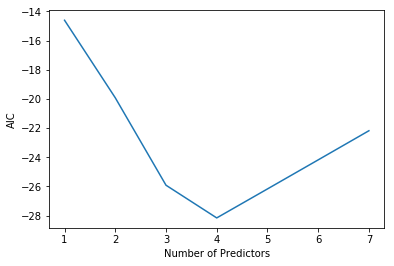

In [20]:
aic = 50 * np.log(rss/50) + np.arange(1,9)*2
plt.plot(np.arange(1,8), aic[1:])
plt.xlabel('Number of Predictors')
plt.ylabel('AIC')
plt.show()

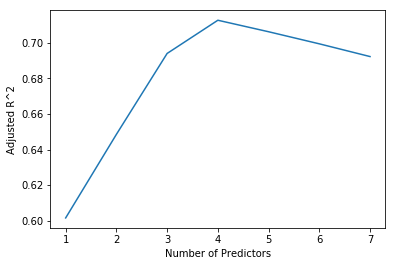

In [21]:
adjr2 = 1 - (rss/(50 - np.arange(1,9)))/(rss[0]/49)
plt.plot(np.arange(1,8),adjr2[1:])
plt.xlabel('Number of Predictors')
plt.ylabel('Adjusted R^2')
plt.show()

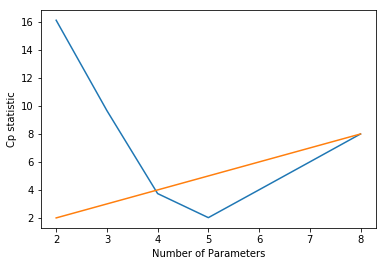

In [22]:
lmod = smf.ols('LifeExp ~ Population + Income + Illiteracy + Murder + HSGrad + Frost + Area', data=statedata).fit()
cpstat = rss/lmod.scale + 2 * np.arange(1,9) - 50
plt.plot(np.arange(2,9),cpstat[1:])
plt.xlabel('Number of Parameters')
plt.ylabel('Cp statistic')
plt.plot([2,8],[2,8])
plt.show()

Calculate the hat values. Although the parameter estimates are the same, the hat values are different from R.

In [23]:
lmod = smf.ols('LifeExp ~ Population + Murder + HSGrad + Frost', data=statedata).fit()
diagv = lmod.get_influence()
hatv = pd.Series(diagv.hat_matrix_diag, statedata.index)
hatv.sort_values().iloc[-5:]

NY    0.225227
HI    0.239792
AK    0.247279
NV    0.288609
CA    0.384759
dtype: float64

Leave out AK as in LMR book.

In [24]:
state49 = statedata.drop(['AK'])
rss = np.empty(len(pcols) + 1)
rss[0] = np.sum((state49.LifeExp - np.mean(state49.LifeExp))**2)
selvar = ['Null']
for k in range(1,len(pcols)+1):
    RSS = {}
    for variables in itertools.combinations(pcols, k):
        predictors = state49.loc[:,list(variables)]
        predictors['Intercept'] = 1
        res = sm.OLS(state49.LifeExp, predictors).fit()
        RSS[variables] = res.ssr
    rss[k] = min(RSS.values())
    selvar.append(min(RSS, key=RSS.get))
adjr2 = 1 - (rss/(49 - np.arange(1,9)))/(rss[0]/48)
adjr2

array([0.        , 0.59232605, 0.66032808, 0.69488547, 0.70867029,
       0.71044047, 0.70730267, 0.70088995])

In [25]:
selvar[adjr2.argmax()]

('Population', 'Murder', 'HSGrad', 'Frost', 'Area')

In [26]:
adjr2.argmax()

5

Scale data and strip plot:

In [27]:
from sklearn.preprocessing import scale
scalstat = pd.DataFrame(scale(statedata), index=statedata.index, columns=statedata.columns)
scalstat.head()

,Population,Income,Illiteracy,LifeExp,Murder,HSGrad,Frost,Area
AL,-0.142867,-1.334552,1.541248,-1.376023,2.113047,-1.476772,-1.641325,-0.237101
AK,-0.878225,3.089295,0.546895,-1.180373,1.073216,1.699888,0.923853,5.868329
AZ,-0.460315,0.154859,1.044071,-0.247272,0.115476,0.624326,-1.738491,0.505283
AR,-0.483394,-1.738961,1.209797,-0.164497,0.744848,-1.651863,-0.766833,-0.222457
CA,3.835528,1.114921,-0.116008,0.625629,0.799576,1.187120,-1.641325,1.013678


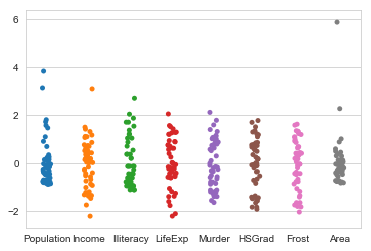

In [28]:
import seaborn as sns
sns.set_style("whitegrid")
sns.stripplot(data=scalstat, jitter=True)
plt.show()

Do variable selection on the transformed model.

In [29]:
lmod = smf.ols('LifeExp ~ np.log(Population) + Income + Illiteracy + Murder + HSGrad + Frost + np.log(Area)', data=statedata).fit()
rss = np.empty(len(pcols) + 1)
rss[0] = np.sum((statedata.LifeExp - np.mean(statedata.LifeExp))**2)
selvar = ['Null']
for k in range(1,len(pcols)+1):
    RSS = {}
    for variables in itertools.combinations(pcols, k):
        predictors = statedata.loc[:,list(variables)]
        predictors['Intercept'] = 1
        res = sm.OLS(statedata.LifeExp, predictors).fit()
        RSS[variables] = res.ssr
    rss[k] = min(RSS.values())
    selvar.append(min(RSS, key=RSS.get))
adjr2 = 1 - (rss/(50 - np.arange(1,9)))/(rss[0]/49)
adjr2


array([0.        , 0.60158926, 0.64849909, 0.69392297, 0.71256902,
       0.7061129 , 0.69932684, 0.69218231])

In [30]:
selvar[adjr2.argmax()]

('Population', 'Murder', 'HSGrad', 'Frost')

Would be worth creating a function for the all subsets regression.

In [31]:
%load_ext version_information
%version_information pandas, numpy, matplotlib, seaborn, scipy, patsy, statsmodels

Software,Version
Python,3.7.0 64bit [Clang 4.0.1 (tags/RELEASE_401/final)]
IPython,6.5.0
OS,Darwin 17.7.0 x86_64 i386 64bit
pandas,0.23.4
numpy,1.15.1
matplotlib,2.2.3
seaborn,0.9.0
scipy,1.1.0
patsy,0.5.0
statsmodels,0.9.0
